In [38]:
import pandas as pd 
from urllib.request import urlopen
from bs4 import BeautifulSoup
import mplfinance as mpf 

# 맨뒤 페이지 숫자 구하기
url = 'https://finance.naver.com/item/sise_day.nhn?code=068270&page=1'
with urlopen(url) as doc:
    html = BeautifulSoup(doc, 'lxml')
    pgrr = html.find('td', class_='pgRR')
    s = str(pgrr.a['href']).split('=')
    last_page = s[-1]

In [39]:
# 전체 페이지 읽어오기
df = pd.DataFrame()
sise_url = 'https://finance.naver.com/item/sise_day.nhn?code=068270'
for page in range(1, int(last_page)+1):
    page_url = '{}&page={}'.format(sise_url, page)
    df = df.append(pd.read_html(page_url, header=0)[0])

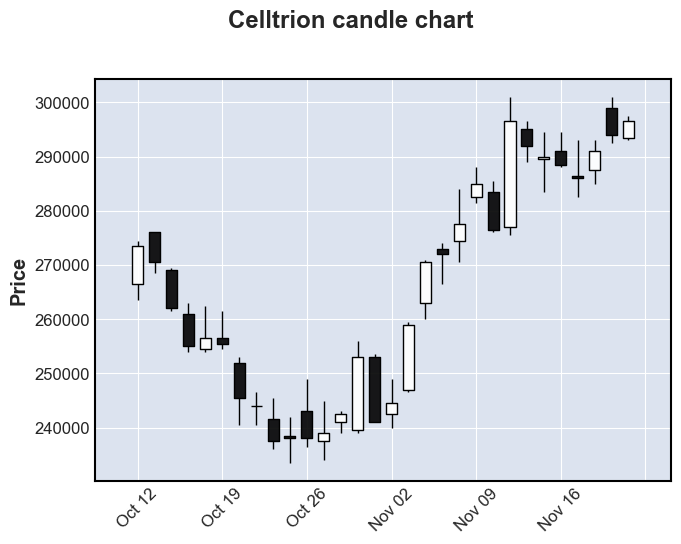

In [40]:
# 차트 출력 위해 데이터프레임 가공하기
df = df.dropna()
df = df.iloc[0:30]

df = df.rename(columns={'날짜':'Date', '시가':'Open', '고가':'High', '저가':'Low', '종가':'Close', '거래량':'Volume'})
df = df.sort_values(by='Date')
df.index = pd.to_datetime(df.Date) # error
df = df[['Open', 'High', 'Low', 'Close', 'Volume']]
mpf.plot(df, title="Celltrion candle chart", type='candle')

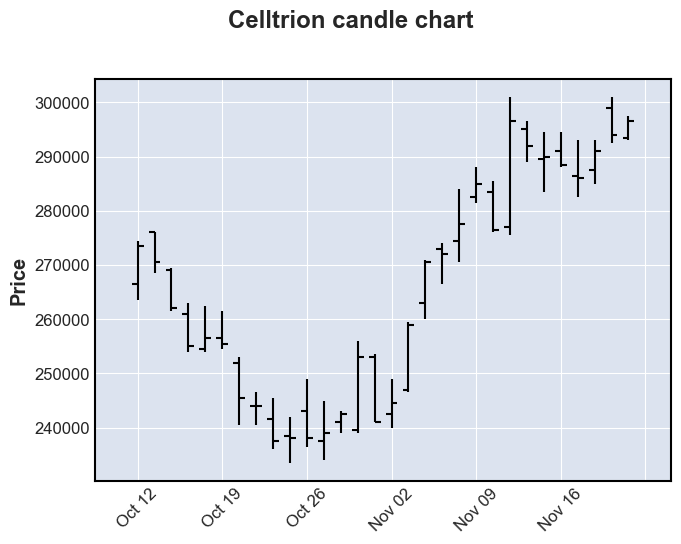

In [41]:
mpf.plot(df, title="Celltrion candle chart")

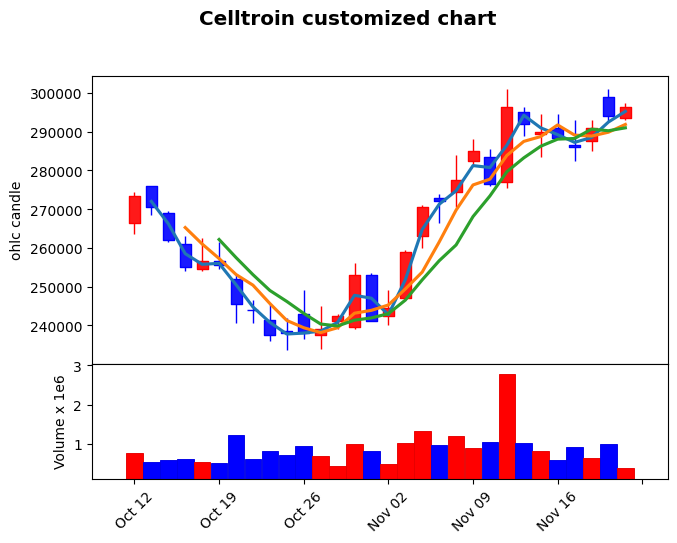

In [42]:
kwargs = dict(title='Celltroin customized chart', type='candle', mav=(2,4,6), volume=True, ylabel='ohlc candle')
mc = mpf.make_marketcolors(up='r', down='b', inherit=True)
s = mpf.make_mpf_style(marketcolors=mc)
mpf.plot(df,**kwargs, style=s)
